In [26]:

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [27]:
#Read CSV File Salary by School Name
salary_by_inst = pd.read_csv('salaries-by-college-type.csv')
salary_by_inst.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [28]:
salary_list = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
              'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']
for x in salary_list:
    salary_by_inst[x] = salary_by_inst[x].str.replace("$","")
    salary_by_inst[x] = salary_by_inst[x].str.replace(",","")
    salary_by_inst[x] = pd.to_numeric(salary_by_inst[x])

salary_by_inst.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


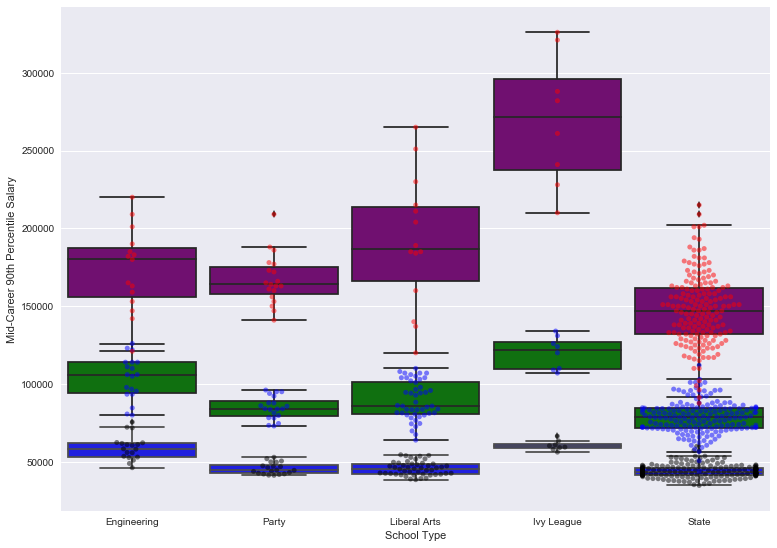

In [75]:
#BoxPlot Salary Vs College Type shows distribution of salary for different School Types for data obtained for 270 Colleges

# sn_plot = sns.lmplot(x="School Type", y="Starting Median Salary", data=salary_by_inst, fit_reg=False,legend=True, 
#                       legend_out=True, aspect=1.5, scatter_kws = {'alpha':0.5, 'linewidths':1,'edgecolor':'black', 'marker':'o'}, 
#                      palette={"Starting Median Salary":"skyblue"})

sn_plot_college_type = sns.boxplot(x="School Type", y="Starting Median Salary", width=0.9, data=salary_by_inst, color="blue")
sn_plot_college_type = sns.boxplot(x="School Type", y="Mid-Career Median Salary", width=0.9, data=salary_by_inst, color="green")
sn_plot_college_type = sns.boxplot(x="School Type", y="Mid-Career 90th Percentile Salary", width=0.9, data=salary_by_inst, color="purple")
sn_plot_collge = sns.swarmplot(x="School Type", y="Starting Median Salary", data=salary_by_inst, color="black", alpha=0.5)
sn_plot_collge = sns.swarmplot(x="School Type", y="Mid-Career Median Salary", data=salary_by_inst, color="blue", alpha=0.5)
sn_plot_collge = sns.swarmplot(x="School Type", y="Mid-Career 90th Percentile Salary", data=salary_by_inst, color="red", alpha=0.5)
sns.set(rc={'figure.figsize':(12.7,9.27)})
plt.show()

In [66]:
#Scatter Plot by Region
salary_by_region = pd.read_csv('salaries-by-region.csv')
salary_by_region.head()


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [67]:
#changing the string value to numeric

salary_list = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
              'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']
for x in salary_list:
    salary_by_region[x] = salary_by_region[x].str.replace("$","")
    salary_by_region[x] = salary_by_region[x].str.replace(",","")
    salary_by_region[x] = pd.to_numeric(salary_by_region[x])

salary_by_region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


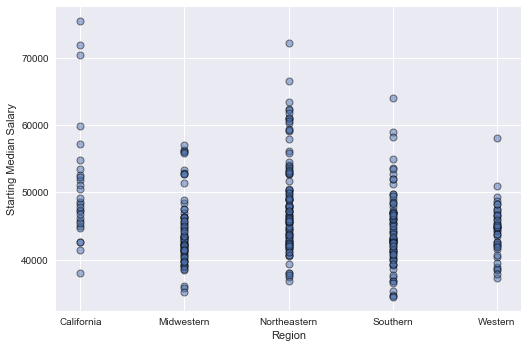

In [68]:
sn_plot = sns.lmplot(x="Region", y="Starting Median Salary", data=salary_by_region, fit_reg=False,legend=True, 
                      legend_out=True, aspect=1.5, scatter_kws = {'alpha':0.5, 'linewidths':1,'edgecolor':'black', 'marker':'o'}, 
                      palette={"Starting Median Salary":"skyblue"})
plt.show()